# Exploratory Analysis and Feature Engineering

### Load Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("skillshare_2022_starts_views_combined.csv")
data.drop(labels= ['Unnamed: 0'], axis = 1, inplace=True)

In [3]:
# loading in video views (one file at a time)
vviews = pd.read_csv("skillshare_2022_vviews/skillshare_2022_vviews_0.csv")
vviews.drop(labels= ['Unnamed: 0'], axis = 1, inplace=True)
for i in range(1,63):
    temp_vviews = pd.read_csv("skillshare_2022_vviews/skillshare_2022_vviews_{}.csv".format(i))
    temp_vviews.drop(labels= ['Unnamed: 0'], axis = 1, inplace=True)
    vviews = pd.concat([vviews, temp_vviews])
print("Total rows: {}".format(vviews.size))

Total rows: 146657168


In [4]:
# loading in website visits (one file at a time)
visits = pd.read_csv("skillshare_2022_visits/skillshare_2022_visits_0.csv", error_bad_lines=False)
visits.drop(labels= ['Unnamed: 0'], axis = 1, inplace=True)
for i in range(1,23):
    temp_visits = pd.read_csv("skillshare_2022_visits/skillshare_2022_visits_{}.csv".format(i), error_bad_lines=False)
    temp_visits.drop(labels= ['Unnamed: 0'], axis = 1, inplace=True)
    visits = pd.concat([visits, temp_visits])
print("Total rows: {}".format(visits.size))

C:\Users\gwams\AppData\Local\Temp\ipykernel_1908\2915586678.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  visits = pd.read_csv("skillshare_2022_visits/skillshare_2022_visits_0.csv", error_bad_lines=False)
b'Skipping line 267551: expected 13 fields, saw 18\n'
b'Skipping line 400714: expected 13 fields, saw 16\n'
C:\Users\gwams\AppData\Local\Temp\ipykernel_1908\2915586678.py:2: DtypeWarning: Columns (0,1,4,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  visits = pd.read_csv("skillshare_2022_visits/skillshare_2022_visits_0.csv", error_bad_lines=False)
C:\Users\gwams\AppData\Local\Temp\ipykernel_1908\2915586678.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  temp_visits = pd.read_csv("skillshare_2022_visits/skillshare_2022_visits_{}.csv".format(i), err

C:\Users\gwams\AppData\Local\Temp\ipykernel_1908\2915586678.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  temp_visits = pd.read_csv("skillshare_2022_visits/skillshare_2022_visits_{}.csv".format(i), error_bad_lines=False)
b'Skipping line 268202: expected 13 fields, saw 19\n'
b'Skipping line 669088: expected 13 fields, saw 18\n'
C:\Users\gwams\AppData\Local\Temp\ipykernel_1908\2915586678.py:5: DtypeWarning: Columns (1,4,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_visits = pd.read_csv("skillshare_2022_visits/skillshare_2022_visits_{}.csv".format(i), error_bad_lines=False)
C:\Users\gwams\AppData\Local\Temp\ipykernel_1908\2915586678.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  temp_visits = pd.read_csv("skillshare_2022_visits/skillshare_2022

Total rows: 155412720


In [5]:
combined_data = pd.read_csv("skillshare_combined.csv")

In [6]:
# contains user_id, "success" indicator, various codes associates with trial/payment
data.head()

,user_uid,create_time,success,is_cancelled,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,day-1,...,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31
0,23692129,2022-01-01 00:00:02,0,True,2,2,0,10,30,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23674285,2022-01-01 00:00:27,0,False,-1,-1,0,2,116,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16119588,2022-01-01 00:01:19,1,False,1,5,0,10,30,347.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23693101,2022-01-01 00:01:42,0,False,2,2,0,16,55,1211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23692349,2022-01-01 00:02:04,1,False,2,2,0,16,55,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# contains viewing totals for each user per class, per day
vviews.head()

,uid,class_id,lesson_id,lesson_number,is_trailer,video_duration,view_date,sum
0,1128075,121998,1533011,6,False,407.0,2022-01-07,333
1,23721429,285819,2992845,3,False,379.0,2022-01-07,215
2,23747223,151243,2482675,5,False,372.0,2022-01-07,192
3,23630537,108140,652188,19,False,203.0,2022-01-07,24
4,23693292,516912,4244299,3,False,340.0,2022-01-07,89


In [8]:
# each user's visits and visit information to the website
visits.head()

,uid,visit_id,visit_date,visit_duration,platform,marketing_channel,landing_event_name,has_signup,has_checkout_view,has_initiate_checkout,has_premium_start,is_existing_premium
0,20748409,614b25cf3f30af394f0d53081e30dcb4,2022-03-26,135,web,Direct,Viewed Membership Checkout,False,True,False,False,False
1,11534245,65b2dd6d29e9454372570dd1b6f92170,2022-03-26,1502,web,Other,Viewed-Class,False,False,False,False,True
2,23737452,00182e156cbe8efff389b7dcc4aefbbd,2022-03-26,0,web,Direct,View Home,False,False,False,False,True
3,10484775,11487111de21e9b6f720b9284bbe3755,2022-03-26,103,android_app,Other,View Home,False,False,False,False,True
4,12524843,9c898b4190705fb733701c6c75797d92,2022-03-26,1,android_app,Other,Launched-App,False,False,False,False,False


In [9]:
# videos viewed per user
vviews.groupby("uid").count()

,class_id,lesson_id,lesson_number,is_trailer,video_duration,view_date,sum
uid,,,,,,,
2,40,40,40,40,40,40,40
63,7,7,7,7,7,7,7
389,7,7,7,7,7,7,7
526,10,10,10,10,10,10,10
1309,29,29,29,29,29,29,29
...,...,...,...,...,...,...,...
26615530,1,1,1,1,1,1,1
26617607,5,5,5,5,5,5,5
26629039,8,8,8,8,8,8,8


In [10]:
combined_data.head()

,user_uid,create_time,success,cancellation_time,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,trial_start_day,...,day-31,comment_volume,comment_score,discussion_volume,discussion_score,follow_volume,projects_volume,projects_score,review_volume,rating_avg
0,23692129,2022-01-01 00:00:02,0,2022-01-31 19:46:01,2,2,0,10,30,2022-01-01,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23674285,2022-01-01 00:00:27,0,0.0,-1,-1,0,2,116,2022-01-01,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16119588,2022-01-01 00:01:19,1,0.0,1,5,0,10,30,2022-01-01,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23693101,2022-01-01 00:01:42,0,2022-02-23 17:37:56,2,2,0,16,55,2022-01-01,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23692349,2022-01-01 00:02:04,1,0.0,2,2,0,16,55,2022-01-01,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


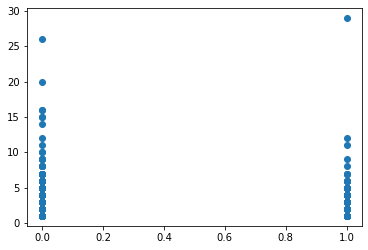

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(combined_data['success'], combined_data['comment_volume'])

In [12]:
combined_data['success'].sum()/len(combined_data)

0.23918493715401054

In [13]:
combined_data.isnull().sum()

user_uid                             0
create_time                          0
success                              0
cancellation_time                    0
payment_provider_cat_codes           0
payment_ux_cat_codes                 0
trial_length_offer_cat_codes         0
sub_utm_channel_cat_codes            0
sub_utm_source_cat_codes             0
trial_start_day                      0
trial_end_day                        0
is_cancel_during_trial               0
day-1                                0
day-2                                0
day-3                                0
day-4                                0
day-5                                0
day-6                                0
day-7                                0
day-8                                0
day-9                                0
day-10                               0
day-11                               0
day-12                               0
day-13                               0
day-14                   

In [14]:
combined_data.groupby(['user_uid']).count().sort_values(by = 'create_time', ascending = False)

,create_time,success,cancellation_time,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,trial_start_day,trial_end_day,...,day-31,comment_volume,comment_score,discussion_volume,discussion_score,follow_volume,projects_volume,projects_score,review_volume,rating_avg
user_uid,,,,,,,,,,,,,,,,,,,,,
63,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
25275918,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
25275978,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
25275963,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
25275962,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24271151,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
24271150,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
24271149,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
numerics = ['int16', 'int32', 'int64', 'float']
numer_data = combined_data.select_dtypes(include=numerics)
numer_data = numer_data.drop(labels = ['comment_volume', 'comment_score', 'discussion_volume', 'discussion_score', 
                                       'follow_volume', 'projects_volume', 'discussion_score', 'follow_volume', 
                                       'projects_volume', 'projects_score', 'review_volume', 'rating_avg'], axis = 1)
numer_data
# model.fit(numer_data.iloc[:, 4:], numer_data['success'])

,user_uid,success,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,is_cancel_during_trial,day-1,day-2,...,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31
0,23692129,0,2,2,0,10,30,1,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23674285,0,-1,-1,0,2,116,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16119588,1,1,5,0,10,30,0,347.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23693101,0,2,2,0,16,55,0,1211.0,266.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23692349,1,2,2,0,16,55,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475443,26284161,0,2,2,0,0,35,0,0.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
475444,26259150,0,2,2,0,17,227,0,0.0,1508.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
475445,26284159,0,1,5,0,17,227,1,0.0,217.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
475446,9742534,0,1,5,0,10,30,1,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
classes = pd.read_csv("skillshare_2022_classes.csv", index_col = 0)
classes.head()

C:\Users\gwams\AppData\Local\Temp\ipykernel_1908\2878181601.py:1: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  classes = pd.read_csv("skillshare_2022_classes.csv", index_col = 0)


,class_id,class_title,create_time,description,takeaway,category,subcategory,status,is_featured,is_premium_only,...,language_grade_notes_all,has_non_english_content,non_english_language_1,class_origin,class_origin_raw,published_class_number,teacher_first_publish_time,is_last_published_class,is_first_original_class,is_first_quality_class
0,23577,A Crash Course in Photographic Composition,2013-01-22 17:41:39,<p>This class is for anybody who wants to crea...,NaN,Creative,Photography,published,True,True,...,NaN,False,NaN,Other,No Source,1,2013-01-22 17:41:39,True,False,True
1,51370,Drawing Time: Illustrator Techniques,2013-01-31 23:54:50,"<p><img src=""https://static.skillshare.com/upl...",NaN,Creative,Illustration,published,True,True,...,NaN,False,NaN,Other,No Source,1,2013-01-31 23:54:50,True,False,False
2,55284,Perfect Southern Fried Chicken + Buttermilk Bi...,2013-02-01 23:50:57,<p><strong>Make The Best Southern Fried Chicke...,NaN,Lifestyle,Culinary,published,True,True,...,NaN,False,NaN,Other,No Source,1,2013-02-01 23:50:57,True,False,False
3,65056,EasyDSLR: Master your Digital Camera in less t...,2013-02-05 00:16:27,<p>So you finally got that DSLR camera you've ...,NaN,NaN,Photography,published,True,True,...,NaN,False,NaN,Other,No Source,1,2013-02-05 00:16:27,True,False,False
4,100968,Pattern Design: Creating Repeat Patterns From ...,2013-03-30 04:02:06,<p>Ever wanted to create your own hand-drawn p...,NaN,Creative,Graphic Design,published,True,True,...,NaN,False,NaN,Other,No Source,1,2013-03-30 04:02:06,True,False,False


In [17]:
classes.columns

Index(['class_id', 'class_title', 'create_time', 'description', 'takeaway',
       'category', 'subcategory', 'status', 'is_featured', 'is_premium_only',
       'publish_time', 'publish_date', 'teacher_uid', 'teacher_name',
       'is_top_teacher', 'teacher_create_time', 'teacher_account_age',
       'is_original', 'class_type', 'quality_grade', 'quality_grade_letter',
       'is_quality_class', 'grade_note', 'n_reviews', 'review_avg', 'level_id',
       'level', 'has_been_staff_pick', 'n_times_staff_pick',
       'first_staff_pick_time', 'last_staff_pick_time', 'has_project',
       'project_title', 'sku', 'class_detail_page_link',
       'total_video_duration', 'n_lessons', 'trailer_duration',
       'first_lesson_duration', 'class_display_name', 'image_huge', 'language',
       'language_grade_notes_1', 'language_grade_notes_2',
       'language_grade_notes_3', 'language_grade_notes_all',
       'has_non_english_content', 'non_english_language_1', 'class_origin',
       'class_origi

#### Analysis of Class Views

Look at number of classes done


avg percent of lessons completed in class


Avg rating of classes "taken"


In [18]:
pd.set_option('display.max_columns', None)

In [19]:
vviews.head()

,uid,class_id,lesson_id,lesson_number,is_trailer,video_duration,view_date,sum
0,1128075,121998,1533011,6,False,407.0,2022-01-07,333
1,23721429,285819,2992845,3,False,379.0,2022-01-07,215
2,23747223,151243,2482675,5,False,372.0,2022-01-07,192
3,23630537,108140,652188,19,False,203.0,2022-01-07,24
4,23693292,516912,4244299,3,False,340.0,2022-01-07,89


In [20]:
vviews['percent_duration_watched'] = vviews['sum'] / vviews['video_duration']
vviews.sort_values(by = 'percent_duration_watched', ascending = False)

,uid,class_id,lesson_id,lesson_number,is_trailer,video_duration,view_date,sum,percent_duration_watched
245807,8554570,474754,3834939,1,False,33.0,2022-05-10,25391,769.424242
242376,8554570,474754,3834939,1,False,33.0,2022-05-09,25357,768.393939
188639,22527652,265586,2918719,1,False,45.0,2022-02-21,22065,490.333333
71379,23830467,364462,3284070,2,False,57.0,2022-01-17,27029,474.192982
124420,25185655,377800,3943275,0,True,89.0,2022-03-25,34275,385.112360
...,...,...,...,...,...,...,...,...,...
176103,26260228,108140,652800,0,True,NaN,2022-05-30,31,NaN
179361,25550184,108140,652800,0,True,NaN,2022-06-01,32,NaN
182822,26224023,353208,3793082,20,False,NaN,2022-06-01,183,NaN
228318,26221707,108140,652800,0,True,NaN,2022-05-28,31,NaN


In [21]:
lessons_per_class = vviews.groupby(['uid', 'class_id']).nunique()
# lessons_per_class.drop(labels = ['uid', 'class_id'], axis = 1, inplace=True)
lessons_per_class.reset_index(inplace=True)
lessons_per_class.head()

,uid,class_id,lesson_id,lesson_number,is_trailer,video_duration,view_date,sum,percent_duration_watched
0,2,244286,7,7,2,7,1,6,7
1,2,248299,1,1,1,1,1,1,1
2,2,286836,8,8,2,7,1,7,8
3,2,297802,8,8,2,7,1,5,8
4,2,305856,2,2,2,2,1,2,2


In [22]:
lessons_per_class = lessons_per_class.merge(classes[['class_id', 'n_lessons']], left_on = 'class_id', right_on = 'class_id', how = 'left')
lessons_per_class = lessons_per_class[['uid', 'class_id', 'lesson_id', 'n_lessons']]
lessons_per_class['percent_lessons_watched'] = lessons_per_class['lesson_id']/lessons_per_class['n_lessons']
lessons_per_class.head()

,uid,class_id,lesson_id,n_lessons,percent_lessons_watched
0,2,244286,7,7.0,1.000000
1,2,248299,1,10.0,0.100000
2,2,286836,8,38.0,0.210526
3,2,297802,8,22.0,0.363636
4,2,305856,2,7.0,0.285714


In [23]:
avg_lessons_watched = lessons_per_class.groupby('uid').mean().reset_index()[['uid', 'percent_lessons_watched']]
avg_lessons_watched.head()

,uid,percent_lessons_watched
0,2,0.347018
1,63,0.700000
2,389,0.700000
3,526,0.888889
4,1309,0.398803


In [24]:
combined_data = combined_data.merge(avg_lessons_watched, left_on = 'user_uid', right_on = 'uid', how = 'left')
combined_data.drop(labels = ['uid'], axis = 1, inplace=True)
combined_data.head()

,user_uid,create_time,success,cancellation_time,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,trial_start_day,trial_end_day,is_cancel_during_trial,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,comment_volume,comment_score,discussion_volume,discussion_score,follow_volume,projects_volume,projects_score,review_volume,rating_avg,percent_lessons_watched
0,23692129,2022-01-01 00:00:02,0,2022-01-31 19:46:01,2,2,0,10,30,2022-01-01,2022-02-01,1,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062500
1,23674285,2022-01-01 00:00:27,0,0.0,-1,-1,0,2,116,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16119588,2022-01-01 00:01:19,1,0.0,1,5,0,10,30,2022-01-01,2022-02-01,0,347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169298
3,23693101,2022-01-01 00:01:42,0,2022-02-23 17:37:56,2,2,0,16,55,2022-01-01,2022-02-01,0,1211.0,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231692
4,23692349,2022-01-01 00:02:04,1,0.0,2,2,0,16,55,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
lessons_per_class.head()

,uid,class_id,lesson_id,n_lessons,percent_lessons_watched
0,2,244286,7,7.0,1.000000
1,2,248299,1,10.0,0.100000
2,2,286836,8,38.0,0.210526
3,2,297802,8,22.0,0.363636
4,2,305856,2,7.0,0.285714


(array([3417482., 1051690.,  725397.,  585870.,  563460.,  772040.,
         802162.,  574538.,  914339., 1165279.]),
 array([0.        , 0.09998575, 0.1999715 , 0.29995725, 0.399943  ,
        0.49992875, 0.59991451, 0.69990026, 0.79988601, 0.89987176,
        0.99985751]),
 <BarContainer object of 10 artists>)

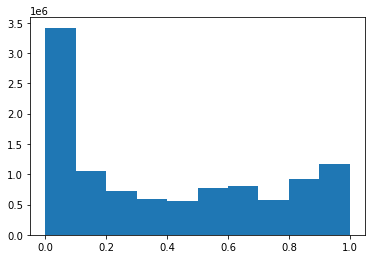

In [26]:
plt.hist(vviews[vviews['percent_duration_watched'] < 1]['percent_duration_watched'])

In [27]:
num_classes = vviews.groupby('uid').nunique()
# num_classes.drop(labels = ['uid'], axis = 1, inplace=True)

num_classes.reset_index(inplace=True)
num_classes.head()

,uid,class_id,lesson_id,lesson_number,is_trailer,video_duration,view_date,sum,percent_duration_watched
0,2,11,40,18,2,36,2,19,40
1,63,1,7,7,2,7,1,7,7
2,389,1,7,7,2,7,2,7,6
3,526,1,8,8,2,8,3,10,10
4,1309,5,29,16,2,28,1,26,29


In [28]:
combined_data = combined_data.merge(num_classes[['uid', 'class_id']], left_on = 'user_uid', right_on = 'uid', how = 'left')
combined_data.rename({'class_id': 'num_classes_watched'}, inplace=True, axis = 1)
combined_data.drop(labels = ['uid'], axis =1,inplace=True)
combined_data.head()

,user_uid,create_time,success,cancellation_time,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,trial_start_day,trial_end_day,is_cancel_during_trial,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,comment_volume,comment_score,discussion_volume,discussion_score,follow_volume,projects_volume,projects_score,review_volume,rating_avg,percent_lessons_watched,num_classes_watched
0,23692129,2022-01-01 00:00:02,0,2022-01-31 19:46:01,2,2,0,10,30,2022-01-01,2022-02-01,1,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062500,1.0
1,23674285,2022-01-01 00:00:27,0,0.0,-1,-1,0,2,116,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16119588,2022-01-01 00:01:19,1,0.0,1,5,0,10,30,2022-01-01,2022-02-01,0,347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169298,3.0
3,23693101,2022-01-01 00:01:42,0,2022-02-23 17:37:56,2,2,0,16,55,2022-01-01,2022-02-01,0,1211.0,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231692,6.0
4,23692349,2022-01-01 00:02:04,1,0.0,2,2,0,16,55,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([213492.,  43036.,  15038.,   7486.,   4046.,   2630.,   1751.,
          1121.,    745.,    514.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ]),
 <BarContainer object of 10 artists>)

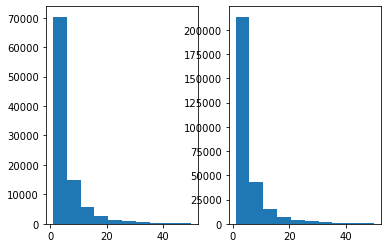

In [29]:
num_watched = combined_data[combined_data['num_classes_watched'] <= 50]
plt.subplot(1,2,1)
plt.hist(num_watched[num_watched['success'] == 1]['num_classes_watched'])
plt.subplot(1,2,2)
plt.hist(num_watched[num_watched['success'] == 0]['num_classes_watched'])

In [30]:
classes_grouped_by_success = combined_data.groupby("success")\
    .mean()['num_classes_watched']

classes_grouped_by_success.head()

success
0    5.691361
1    5.587129
Name: num_classes_watched, dtype: float64

In [31]:
minutes_grouped_by_success = combined_data.groupby("success")\
    .median()['percent_lessons_watched']
minutes_grouped_by_success.head()

success
0    0.285453
1    0.298231
Name: percent_lessons_watched, dtype: float64

In [32]:
combined_data.head()

,user_uid,create_time,success,cancellation_time,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,trial_start_day,trial_end_day,is_cancel_during_trial,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,comment_volume,comment_score,discussion_volume,discussion_score,follow_volume,projects_volume,projects_score,review_volume,rating_avg,percent_lessons_watched,num_classes_watched
0,23692129,2022-01-01 00:00:02,0,2022-01-31 19:46:01,2,2,0,10,30,2022-01-01,2022-02-01,1,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062500,1.0
1,23674285,2022-01-01 00:00:27,0,0.0,-1,-1,0,2,116,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16119588,2022-01-01 00:01:19,1,0.0,1,5,0,10,30,2022-01-01,2022-02-01,0,347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169298,3.0
3,23693101,2022-01-01 00:01:42,0,2022-02-23 17:37:56,2,2,0,16,55,2022-01-01,2022-02-01,0,1211.0,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231692,6.0
4,23692349,2022-01-01 00:02:04,1,0.0,2,2,0,16,55,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
import datetime as dt
combined_data['create_time'] = pd.to_datetime(combined_data['create_time'], errors = 'coerce')
combined_data['cancellation_time'] = pd.to_datetime(combined_data['cancellation_time'], errors = 'coerce')
combined_data['days_canceled_since_start'] = (combined_data['cancellation_time'] - combined_data['create_time']).dt.days
combined_data.head()

,user_uid,create_time,success,cancellation_time,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,trial_start_day,trial_end_day,is_cancel_during_trial,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,comment_volume,comment_score,discussion_volume,discussion_score,follow_volume,projects_volume,projects_score,review_volume,rating_avg,percent_lessons_watched,num_classes_watched,days_canceled_since_start
0,23692129,2022-01-01 00:00:02,0,2022-01-31 19:46:01,2,2,0,10,30,2022-01-01,2022-02-01,1,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062500,1.0,30.0
1,23674285,2022-01-01 00:00:27,0,NaT,-1,-1,0,2,116,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16119588,2022-01-01 00:01:19,1,NaT,1,5,0,10,30,2022-01-01,2022-02-01,0,347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169298,3.0,NaN
3,23693101,2022-01-01 00:01:42,0,2022-02-23 17:37:56,2,2,0,16,55,2022-01-01,2022-02-01,0,1211.0,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231692,6.0,53.0
4,23692349,2022-01-01 00:02:04,1,NaT,2,2,0,16,55,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([1.03659e+05, 1.52253e+05, 2.80530e+04, 6.66080e+04, 1.55700e+03,
        5.29000e+02, 3.33000e+02, 2.19000e+02, 1.54000e+02, 7.00000e+01]),
 array([  0. ,  16.9,  33.8,  50.7,  67.6,  84.5, 101.4, 118.3, 135.2,
        152.1, 169. ]),
 <BarContainer object of 10 artists>)

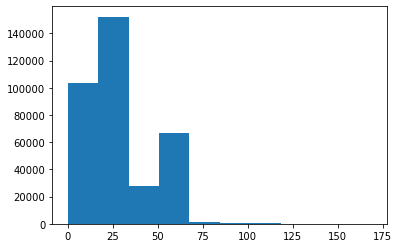

In [34]:
plt.hist(combined_data['days_canceled_since_start'])

In [35]:
# being really heavy into one specific course could point to only wanting the free trial for a specific course
# 7-day trial is given when someone goes to skillshare and signs up organically (40%) - these people searched for skillshare
# 30-day trial is given to those who navigate through paid marketing (25%) - these people "stumbled" upon skillshare

In [36]:
classes.head()

,class_id,class_title,create_time,description,takeaway,category,subcategory,status,is_featured,is_premium_only,publish_time,publish_date,teacher_uid,teacher_name,is_top_teacher,teacher_create_time,teacher_account_age,is_original,class_type,quality_grade,quality_grade_letter,is_quality_class,grade_note,n_reviews,review_avg,level_id,level,has_been_staff_pick,n_times_staff_pick,first_staff_pick_time,last_staff_pick_time,has_project,project_title,sku,class_detail_page_link,total_video_duration,n_lessons,trailer_duration,first_lesson_duration,class_display_name,image_huge,language,language_grade_notes_1,language_grade_notes_2,language_grade_notes_3,language_grade_notes_all,has_non_english_content,non_english_language_1,class_origin,class_origin_raw,published_class_number,teacher_first_publish_time,is_last_published_class,is_first_original_class,is_first_quality_class
0,23577,A Crash Course in Photographic Composition,2013-01-22 17:41:39,<p>This class is for anybody who wants to crea...,NaN,Creative,Photography,published,True,True,2013-01-22 17:41:39,2013-01-22,86,Frank Wang,False,2011-04-05 00:20:30,658.0,False,Platform,85,B,True,Backgrade- Not Manually Reviewed,148.0,3.1,1.0,beginner,NaN,NaN,NaN,NaN,True,Create five photos per unit that utilize the c...,884656564,https://skillshare.com/classes/anything/884656564,136.2500,4.0,23.13,27.78,Frank Wang - 2013 (23577),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,No Source,1,2013-01-22 17:41:39,True,False,True
1,51370,Drawing Time: Illustrator Techniques,2013-01-31 23:54:50,"<p><img src=""https://static.skillshare.com/upl...",NaN,Creative,Illustration,published,True,True,2013-01-31 23:54:50,2013-01-31,19302,Will Focus,False,2011-10-16 14:55:36,473.0,False,Platform,65,D,False,Backgrade- Not Manually Reviewed,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Create an awesome vector character illustration!,348532339,https://skillshare.com/classes/anything/348532339,91.1000,8.0,3.47,11.92,Will Focus - 2013 (51370),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,No Source,1,2013-01-31 23:54:50,True,False,False
2,55284,Perfect Southern Fried Chicken + Buttermilk Bi...,2013-02-01 23:50:57,<p><strong>Make The Best Southern Fried Chicke...,NaN,Lifestyle,Culinary,published,True,True,2013-02-01 23:50:57,2013-02-01,57686,Kelly Leding,False,2012-04-13 02:26:46,294.0,False,Platform,75,C,False,Backgrade- Not Manually Reviewed,54.0,3.3,4.0,all levels,NaN,NaN,NaN,NaN,True,MAKE AUTHENTIC SOUTHERN FRIED CHICKEN + BUTTER...,243273354,https://skillshare.com/classes/anything/243273354,24.7000,2.0,13.28,11.42,Kelly Leding - 2013 (55284),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,No Source,1,2013-02-01 23:50:57,True,False,False
3,65056,EasyDSLR: Master your Digital Camera in less t...,2013-02-05 00:16:27,<p>So you finally got that DSLR camera you've ...,NaN,NaN,Photography,published,True,True,2013-02-05 00:16:27,2013-02-05,136640,Kenneth Schultz,False,2013-01-28 03:12:45,8.0,False,Platform,75,C,False,Backgrade- Not Manually Reviewed,75.0,3.0,1.0,beginner,NaN,NaN,NaN,NaN,True,Amaze people with a creative photo portfolio,1346189716,https://skillshare.com/classes/anything/134618...,255.1833,14.0,10.80,NaN,Kenneth Schultz - 2013 (65056),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,No Source,1,2013-02-05 00:16:27,True,False,False
4,100968,Pattern Design: Creating Repeat Patterns From ...,2013-03-30 04:02:06,<p>Ever wanted to create your own hand-drawn p...,NaN,Creative,Graphic Design,published,True,True,2013-03-30 04:02:06,2013-03-30,242003,Kristi O'Meara,False,2013-03-18 17:11:45,12.0,False,Platform,75,C,False,Backgrade- Not Manually Reviewed,155.0,3.0,2.0,intermediate,NaN,NaN,NaN,NaN,True,Create print-ready patterns from hand-drawn il...,801373065,https://skillshare.com/classes/anything/801373065,55.1333,6.0,1.13,2.58,Kristi O'Meara - 2013 (100968),h

In [37]:
combined_data.head()
# see if user took a featured class had effect on subscription
# success by category of classes
# success rate by teacher
# average user quality_grade taken for class

,user_uid,create_time,success,cancellation_time,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,trial_start_day,trial_end_day,is_cancel_during_trial,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,comment_volume,comment_score,discussion_volume,discussion_score,follow_volume,projects_volume,projects_score,review_volume,rating_avg,percent_lessons_watched,num_classes_watched,days_canceled_since_start
0,23692129,2022-01-01 00:00:02,0,2022-01-31 19:46:01,2,2,0,10,30,2022-01-01,2022-02-01,1,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062500,1.0,30.0
1,23674285,2022-01-01 00:00:27,0,NaT,-1,-1,0,2,116,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16119588,2022-01-01 00:01:19,1,NaT,1,5,0,10,30,2022-01-01,2022-02-01,0,347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169298,3.0,NaN
3,23693101,2022-01-01 00:01:42,0,2022-02-23 17:37:56,2,2,0,16,55,2022-01-01,2022-02-01,0,1211.0,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231692,6.0,53.0
4,23692349,2022-01-01 00:02:04,1,NaT,2,2,0,16,55,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
vviews.head()

,uid,class_id,lesson_id,lesson_number,is_trailer,video_duration,view_date,sum,percent_duration_watched
0,1128075,121998,1533011,6,False,407.0,2022-01-07,333,0.818182
1,23721429,285819,2992845,3,False,379.0,2022-01-07,215,0.567282
2,23747223,151243,2482675,5,False,372.0,2022-01-07,192,0.516129
3,23630537,108140,652188,19,False,203.0,2022-01-07,24,0.118227
4,23693292,516912,4244299,3,False,340.0,2022-01-07,89,0.261765


In [39]:
class_uid = vviews[['uid', 'class_id']].drop_duplicates().reset_index(drop=True)

In [40]:
class_uid_video = vviews[['uid', 'class_id', 'is_trailer', 'view_date']].drop_duplicates().reset_index(drop=True)

In [41]:
user_video_views = class_uid_video.merge(classes, left_on = 'class_id', right_on = 'class_id', how = 'left')

In [42]:
combined_views_class = class_uid.merge(classes, left_on = 'class_id', right_on = 'class_id', how = 'left')

In [43]:
combined_views_class.sort_values(by = 'uid').head()

,uid,class_id,class_title,create_time,description,takeaway,category,subcategory,status,is_featured,is_premium_only,publish_time,publish_date,teacher_uid,teacher_name,is_top_teacher,teacher_create_time,teacher_account_age,is_original,class_type,quality_grade,quality_grade_letter,is_quality_class,grade_note,n_reviews,review_avg,level_id,level,has_been_staff_pick,n_times_staff_pick,first_staff_pick_time,last_staff_pick_time,has_project,project_title,sku,class_detail_page_link,total_video_duration,n_lessons,trailer_duration,first_lesson_duration,class_display_name,image_huge,language,language_grade_notes_1,language_grade_notes_2,language_grade_notes_3,language_grade_notes_all,has_non_english_content,non_english_language_1,class_origin,class_origin_raw,published_class_number,teacher_first_publish_time,is_last_published_class,is_first_original_class,is_first_quality_class
691695,2,297802,Start your OWN bullet journal | BEGINNER Workshop,2019-01-04 15:22:27,"<p><span style=""font-weight:400;"">This class w...",NaN,Creative,Illustration,published,True,True,2019-01-04 21:05:01,2019-01-04,4113137.0,Marion Plank,False,2018-02-25 18:41:38,313.0,False,Platform,85.0,B,True,NaN,53.0,3.0,1.0,beginner,NaN,NaN,NaN,NaN,True,Thank you for enrolling in this class about se...,1.401645e+09,https://skillshare.com/classes/anything/140164...,33.3166,22.0,1.15,2.13,Marion Plank - 2019 (297802),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,Teachers to Watch [Active],3.0,2018-03-31 19:15:03,False,False,False
691697,2,509766,Journal More Effectively For Self Love And Sel...,2021-06-01 00:19:52,<p>Want to learn how to how to journal for beg...,NaN,Creative,Creative Writing,published,True,True,2021-06-02 16:30:11,2021-06-02,4358114.0,Chantelle Fashion,False,2018-04-06 02:34:38,1153.0,False,Platform,75.0,C,False,EP,1.0,4.0,1.0,beginner,NaN,NaN,NaN,NaN,True,Use one of these prompts to create a journal p...,1.718595e+09,https://skillshare.com/classes/anything/171859...,29.2000,6.0,4.10,2.58,Chantelle Fashion - 2021 (509766),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,Organic Repeat Teaching,14.0,2018-04-09 04:45:02,False,False,False
691696,2,510853,How To Make Your Own Bullet Journal From Scratch,2021-06-07 00:54:16,"<p>In this class, you will learn how to make y...",NaN,Creative,Fine Art,published,True,True,2021-06-07 03:20:06,2021-06-07,13782125.0,Liz Morrell,False,2020-05-31 05:18:13,372.0,False,Platform,75.0,C,False,MK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,"For the class project, we will be creating our...",1.340207e+08,https://skillshare.com/classes/anything/134020662,65.1666,8.0,2.07,3.78,Liz Morrell - 2021 (510853),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,Independent,6.0,2020-10-05 00:05:18,True,False,False
691698,2,286836,What the Heck Is Bullet Journaling?,2018-11-06 21:31:59,<p>Learn the Pros and the Con's to getting sta...,NaN,Lifestyle,Health & Wellness,published,True,True,2018-11-07 13:50:02,2018-11-07,4713380.0,KW Professional Organizers,False,2018-05-20 21:45:44,171.0,False,Platform,85.0,B,True,NaN,37.0,3.0,1.0,beginner,NaN,NaN,NaN,NaN,True,Make sure you create a project and share somet...,4.233477e+08,https://skillshare.com/classes/anything/423347666,110.8833,38.0,1.92,3.75,KW Professional Organizers - 2018 (286836),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Teach Challenge,Teach Challenge,1.0,2018-11-07 13:50:02,False,False,True
691694,2,540096,Organize Your Ideas: Bullet Journaling for Gro...,2021-11-16 15:59:19,<p>Journaling is one of the most powerful self...,NaN,Lifestyle,Health & Wellness,published,True,True,2021-11-16 23:20:12,2021-11-16,8056954.0,Terran Dailey,False,2019-03-25 03:53:11,967.0,False,Platform,75.0,C,False,SV,6.0,3.5,4.0,all levels,NaN,NaN,NaN,NaN,True,To complete the class project all you need to ...,1.719151e+09,https://skillshare.com/classes/anyt

In [44]:
combined_views_class[combined_views_class['uid'] == 24675952]

,uid,class_id,class_title,create_time,description,takeaway,category,subcategory,status,is_featured,is_premium_only,publish_time,publish_date,teacher_uid,teacher_name,is_top_teacher,teacher_create_time,teacher_account_age,is_original,class_type,quality_grade,quality_grade_letter,is_quality_class,grade_note,n_reviews,review_avg,level_id,level,has_been_staff_pick,n_times_staff_pick,first_staff_pick_time,last_staff_pick_time,has_project,project_title,sku,class_detail_page_link,total_video_duration,n_lessons,trailer_duration,first_lesson_duration,class_display_name,image_huge,language,language_grade_notes_1,language_grade_notes_2,language_grade_notes_3,language_grade_notes_all,has_non_english_content,non_english_language_1,class_origin,class_origin_raw,published_class_number,teacher_first_publish_time,is_last_published_class,is_first_original_class,is_first_quality_class
1307937,24675952,146458,Mastering Illustrator: 10 Tips & Tricks to Spe...,2016-07-14 20:21:15,<p>Join DKNG designers Dan Kuhlken and Nathan ...,NaN,Creative,Illustration,published,True,True,2016-07-25 16:00:03,2016-07-25,105092.0,DKNG Studios,False,2012-12-10 03:16:35,1323.0,True,Original,95.0,A,True,Backgrade- Not Manually Reviewed,4011.0,3.4,2.0,intermediate,NaN,NaN,NaN,NaN,True,Try out one of these tricks in your own illust...,1.583545e+09,https://skillshare.com/classes/anything/158354...,40.0166,12.0,2.22,1.83,DKNG Studios - 2016 (146458),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,No Source,4.0,2012-12-11 15:56:02,False,False,False


#### see if user took a featured class had effect on subscription 
     everyone has taken at least one featured class
#### success by category of classes
#### success rate by teacher
#### average user quality_grade taken for class
    not much difference
#### using review data, see if average review left/number of reviews left affects success (check brians notebooks first)

In [45]:
user_avg_classes = combined_views_class.groupby('uid').mean()[['review_avg', 'quality_grade', 'level_id']].reset_index() # avg "value" of courses taken by user
user_avg_classes.head()

,uid,review_avg,quality_grade,level_id
0,2,3.24,81.818182,1.3
1,63,3.40,95.000000,4.0
2,389,3.50,95.000000,1.0
3,526,3.60,95.000000,4.0
4,1309,3.58,87.000000,2.8


In [46]:
combined_data = combined_data.merge(user_avg_classes, left_on = 'user_uid', right_on = 'uid', how = 'left')
combined_data.head()

,user_uid,create_time,success,cancellation_time,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,trial_start_day,trial_end_day,is_cancel_during_trial,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,comment_volume,comment_score,discussion_volume,discussion_score,follow_volume,projects_volume,projects_score,review_volume,rating_avg,percent_lessons_watched,num_classes_watched,days_canceled_since_start,uid,review_avg,quality_grade,level_id
0,23692129,2022-01-01 00:00:02,0,2022-01-31 19:46:01,2,2,0,10,30,2022-01-01,2022-02-01,1,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062500,1.0,30.0,23692129.0,3.200000,95.000000,2.000000
1,23674285,2022-01-01 00:00:27,0,NaT,-1,-1,0,2,116,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16119588,2022-01-01 00:01:19,1,NaT,1,5,0,10,30,2022-01-01,2022-02-01,0,347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169298,3.0,NaN,16119588.0,3.333333,88.333333,1.333333
3,23693101,2022-01-01 00:01:42,0,2022-02-23 17:37:56,2,2,0,16,55,2022-01-01,2022-02-01,0,1211.0,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231692,6.0,53.0,23693101.0,3.533333,89.166667,2.666667
4,23692349,2022-01-01 00:02:04,1,NaT,2,2,0,16,55,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
combined_data.rename({'review_avg':'classes_review_avg', 'quality_grade':'class_quality_grade_avg', 'level_id':'avg_class_difficulty'}, axis = 1, inplace=True)
combined_data.drop('uid', axis =1, inplace=True)

In [48]:
class_review_avg = combined_data.groupby("success")\
    .median()['classes_review_avg']
class_review_avg.head()

success
0    3.400000
1    3.405263
Name: classes_review_avg, dtype: float64

In [49]:
class_quality_avg = combined_data.groupby("success")\
    .mean()['class_quality_grade_avg']
class_quality_avg.head()

success
0    85.438464
1    85.962852
Name: class_quality_grade_avg, dtype: float64

In [50]:
avg_class_difficulty = combined_data.groupby("success")\
    .mean()['avg_class_difficulty']
avg_class_difficulty.head()

success
0    1.885163
1    1.836687
Name: avg_class_difficulty, dtype: float64

In [51]:
classes['is_top_teacher'].value_counts()

False    42081
True      2394
Name: is_top_teacher, dtype: int64

In [52]:
combined_views_class['is_top_teacher'] = combined_views_class['is_top_teacher'].astype(bool)
user_sum_tt = combined_views_class.groupby('uid').sum()['is_top_teacher'].reset_index()
user_sum_tt.head()


,uid,is_top_teacher
0,2,0
1,63,0
2,389,0
3,526,0
4,1309,3


In [53]:
combined_views_class[combined_views_class['uid'] == 11285464]

,uid,class_id,class_title,create_time,description,takeaway,category,subcategory,status,is_featured,is_premium_only,publish_time,publish_date,teacher_uid,teacher_name,is_top_teacher,teacher_create_time,teacher_account_age,is_original,class_type,quality_grade,quality_grade_letter,is_quality_class,grade_note,n_reviews,review_avg,level_id,level,has_been_staff_pick,n_times_staff_pick,first_staff_pick_time,last_staff_pick_time,has_project,project_title,sku,class_detail_page_link,total_video_duration,n_lessons,trailer_duration,first_lesson_duration,class_display_name,image_huge,language,language_grade_notes_1,language_grade_notes_2,language_grade_notes_3,language_grade_notes_all,has_non_english_content,non_english_language_1,class_origin,class_origin_raw,published_class_number,teacher_first_publish_time,is_last_published_class,is_first_original_class,is_first_quality_class
1722699,11285464,156153,Adobe Illustrator: How To Make Seamless Owl Pa...,2016-09-19 03:30:13,"<p><img src=""https://static.skillshare.com/upl...",NaN,Creative,Graphic Design,published,True,True,2016-09-19 14:25:02,2016-09-19,1155347.0,Jamber W.,False,2015-10-20 02:59:59,335.0,False,Platform,75.0,C,False,Reviewed in D Audit Q3 2019\nGE - D-level Audi...,21.0,3.6,1.0,beginner,NaN,NaN,NaN,NaN,False,NaN,1.349948e+09,https://skillshare.com/classes/anything/134994...,13.4833,2.0,0.62,12.87,Jamber W. - 2016 (156153),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,No Source,1.0,2016-09-19 14:25:02,True,False,False
1722709,11285464,537322,How To Build A Landing Page [High Converting -...,2021-11-01 22:59:56,"<p><strong>In this impactful and quick course,...",NaN,Business,Marketing,published,True,True,2021-11-02 00:10:14,2021-11-02,18217553.0,Adrian Hallberg,False,2021-03-09 04:29:14,238.0,False,Platform,75.0,C,False,"SV - 100\n\nSV - 03/14/2022 - 108, 105, 107\n\...",1.0,4.0,1.0,beginner,NaN,NaN,NaN,NaN,True,Find some tools and a website to practice maki...,1.597314e+09,https://skillshare.com/classes/anything/159731...,37.1000,4.0,0.92,20.30,Adrian Hallberg - 2021 (537322),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,No Source,3.0,2021-10-15 19:50:04,False,False,False
1722718,11285464,560223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1722724,11285464,563392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1722725,11285464,552421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773883,11285464,580905,Learn Canva for Social media and Printing design,2022-06-19 17:22:18,<p><strong>Are you ready to create something r...,NaN,Creative,Graphic Design,published,True,True,2022-06-20 22:15:08,2022-06-20,25810775.0,Riani Foued,False,2022-04-28 19:46:10,53.0,False,Platform,75.0,C,False,SV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,creat your brand design for web and print usin...,1.512600e+08,https://skillshare.com/classes/anything/151260009,194.2000,21.0,1.18,4.62,Riani Foued - 2022 (580905),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,Independent,1.0,2022-06-20 22:15:08,False,False,False
1773884,11285464,580679,Figma Fashion Web App UI/UX - Design a Complet...,2022-06-17 21:09:16,"<p><img src=""https://static.skillshare.com/upl...",Na

In [54]:
combined_views_class[combined_views_class['uid'] == 23319167]

,uid,class_id,class_title,create_time,description,takeaway,category,subcategory,status,is_featured,is_premium_only,publish_time,publish_date,teacher_uid,teacher_name,is_top_teacher,teacher_create_time,teacher_account_age,is_original,class_type,quality_grade,quality_grade_letter,is_quality_class,grade_note,n_reviews,review_avg,level_id,level,has_been_staff_pick,n_times_staff_pick,first_staff_pick_time,last_staff_pick_time,has_project,project_title,sku,class_detail_page_link,total_video_duration,n_lessons,trailer_duration,first_lesson_duration,class_display_name,image_huge,language,language_grade_notes_1,language_grade_notes_2,language_grade_notes_3,language_grade_notes_all,has_non_english_content,non_english_language_1,class_origin,class_origin_raw,published_class_number,teacher_first_publish_time,is_last_published_class,is_first_original_class,is_first_quality_class
410538,23319167,342682,The Beginner's Guide to Adobe After Effects,2019-07-19 03:10:53,"<p><img src=""https://static.skillshare.com/upl...",NaN,Creative,Animation,published,True,True,2019-07-19 19:00:02,2019-07-19,433417.0,Jake Bartlett,True,2013-10-14 17:41:44,2104.0,False,Top teacher,90.0,B+,True,NaN,1060.0,3.7,1.0,beginner,NaN,NaN,NaN,NaN,True,"For the class project, you'll be building a&nb...",1.758053e+09,https://skillshare.com/classes/anything/175805...,359.9666,34.0,2.87,7.58,Jake Bartlett - 2019 (342682),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Top Teacher,Top Teacher,29.0,2013-11-18 17:26:22,False,False,False


In [55]:
user_sum_tt.sort_values(by='is_top_teacher')

,uid,is_top_teacher
0,2,0
180109,24253274,0
354363,25415899,0
180111,24253294,0
180112,24253303,0
...,...,...
220735,24536097,226
65500,19470622,227
91778,23337615,276
396364,25682286,345


In [56]:
combined_views_class.head()

,uid,class_id,class_title,create_time,description,takeaway,category,subcategory,status,is_featured,is_premium_only,publish_time,publish_date,teacher_uid,teacher_name,is_top_teacher,teacher_create_time,teacher_account_age,is_original,class_type,quality_grade,quality_grade_letter,is_quality_class,grade_note,n_reviews,review_avg,level_id,level,has_been_staff_pick,n_times_staff_pick,first_staff_pick_time,last_staff_pick_time,has_project,project_title,sku,class_detail_page_link,total_video_duration,n_lessons,trailer_duration,first_lesson_duration,class_display_name,image_huge,language,language_grade_notes_1,language_grade_notes_2,language_grade_notes_3,language_grade_notes_all,has_non_english_content,non_english_language_1,class_origin,class_origin_raw,published_class_number,teacher_first_publish_time,is_last_published_class,is_first_original_class,is_first_quality_class
0,1128075,121998,Sketchbook Magic I: Start and Feed a Daily Art...,2015-09-18 15:59:49,"<p>Artist and illustrator, Ria Sharon guides y...",NaN,Lifestyle,Crafts,published,True,True,2015-09-21 03:00:04,2015-09-21,999783.0,Ria Sharon,False,2015-07-26 13:23:57,57.0,False,Platform,90.0,B+,True,KU - 800,1493.0,3.3,4.0,all levels,NaN,NaN,NaN,NaN,True,A Sketch-a-Day,1.314049e+09,https://skillshare.com/classes/anything/131404...,35.8333,8.0,2.12,2.53,Ria Sharon - 2015 (121998),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,No Source,1.0,2015-09-21 03:00:04,False,False,True
1,23721429,285819,Animation for Illustration: Adding Movement wi...,2018-11-01 16:41:46,<p><strong>Looking to take your illustrations ...,NaN,Creative,Animation,published,True,True,2018-11-12 18:55:02,2018-11-12,5417905.0,Libby VanderPloeg,False,2018-07-31 19:02:53,104.0,True,Original,95.0,A,True,NaN,528.0,3.6,2.0,intermediate,NaN,NaN,NaN,NaN,True,Create your own animation!,1.141498e+09,https://skillshare.com/classes/anything/114149...,50.8166,11.0,1.18,5.03,Libby VanderPloeg - 2018 (285819),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Skillshare Original,SK Original,1.0,2018-11-12 18:55:02,True,True,True
2,23747223,151243,Productive Prioritization: Tools to Build Your...,2016-08-18 21:36:07,"<p>Productivity isn't just about ""getting thin...",NaN,Business,Productivity,published,True,True,2016-09-06 01:20:03,2016-09-06,1989586.0,Brian Cervino,False,2016-08-19 14:43:26,18.0,True,Original,95.0,A,True,Backgrade- Not Manually Reviewed,1261.0,3.1,1.0,beginner,NaN,NaN,NaN,NaN,True,Share how you’ve made your day more productive!,1.921238e+09,https://skillshare.com/classes/anything/192123...,30.7666,9.0,1.22,1.42,Brian Cervino - 2016 (151243),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,No Source,1.0,2016-09-06 01:20:03,True,True,True
3,23630537,108140,American Sign Language Level 1,2014-09-18 22:46:59,<p>This course is designed to give students a ...,NaN,Lifestyle,Languages,published,True,True,2014-10-09 17:36:14,2014-10-09,673280.0,Intellezy Trainers,False,2014-09-18 20:50:54,21.0,False,Platform,75.0,C,False,Reviewed in C Audit Q4 2019\n108 EP,389.0,3.5,1.0,beginner,NaN,NaN,NaN,NaN,True,American Sign Language,3.874272e+08,https://skillshare.com/classes/anything/387427223,145.6500,25.0,NaN,0.52,Intellezy Trainers - 2014 (108140),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,No Source,1.0,2014-10-09 17:36:14,False,False,False
4,23693292,516912,Triple Your Typing Speed - The Ultimate Guide ...,2021-07-08 08:28:14,<p>Typing really fast is one of those skills t...,NaN,Lifestyle,Teaching,published,True,True,2021-07-08 15:10:19,2021-07-08,6598235.0,Ali Abdaal,True,2018-11-30 09:33:41,951.0,False,Top teacher,90.0,B+,True,AM - 800,265.0,3.2,4.0,all levels,NaN,NaN,NaN,NaN,True,For the class project I've created a custom ty...,8.557733e+08,https://skillshare.com/classes/anything/855773348,52.2166,12.0,0.90,3.42,Ali Abdaal - 2021 (516912),https://static.s

In [57]:
combined_views_class[combined_views_class['uid'] == 2]

,uid,class_id,class_title,create_time,description,takeaway,category,subcategory,status,is_featured,is_premium_only,publish_time,publish_date,teacher_uid,teacher_name,is_top_teacher,teacher_create_time,teacher_account_age,is_original,class_type,quality_grade,quality_grade_letter,is_quality_class,grade_note,n_reviews,review_avg,level_id,level,has_been_staff_pick,n_times_staff_pick,first_staff_pick_time,last_staff_pick_time,has_project,project_title,sku,class_detail_page_link,total_video_duration,n_lessons,trailer_duration,first_lesson_duration,class_display_name,image_huge,language,language_grade_notes_1,language_grade_notes_2,language_grade_notes_3,language_grade_notes_all,has_non_english_content,non_english_language_1,class_origin,class_origin_raw,published_class_number,teacher_first_publish_time,is_last_published_class,is_first_original_class,is_first_quality_class
682290,2,341885,YouTube Success: Build an Authentic Channel Th...,2019-07-15 14:53:30,<p><strong>Join YouTube star Sorelle Amore to ...,NaN,Creative,Film & Video,published,True,True,2020-01-21 13:35:09,2020-01-21,8971457.0,Sorelle Amore,False,2019-06-20 20:41:01,215.0,True,Original,95.0,A,True,NaN,2020.0,3.5,1.0,beginner,NaN,NaN,NaN,NaN,True,Share your YouTube channel!,4.807718e+08,https://skillshare.com/classes/anything/480771818,55.0500,9.0,1.67,4.32,Sorelle Amore - 2020 (341885),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Skillshare Original,SK Original,1.0,2020-01-21 13:35:09,True,True,True
682291,2,493762,YOUTUBE: How To Create A Successful YouTube Ch...,2021-03-19 20:29:15,<p>Welcome to this YouTube Masterclass. Today ...,NaN,Creative,Film & Video,published,True,True,2021-03-22 20:35:07,2021-03-22,12884224.0,Dylan Reeves-Fellows,False,2020-04-23 20:31:34,333.0,False,Platform,90.0,B+,True,MK \nAM - Final grade,41.0,2.8,1.0,beginner,NaN,NaN,NaN,NaN,True,After learning the foundations for advanced br...,1.011229e+08,https://skillshare.com/classes/anything/101122909,40.0500,11.0,0.77,3.08,Dylan Reeves-Fellows - 2021 (493762),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,Organic Repeat Teaching,10.0,2020-06-01 20:40:16,False,False,False
691685,2,248299,Bullet journal Weekly Spread: Tips & Process t...,2018-05-16 22:04:42,<p><strong>One of the reasons I love bullet jo...,NaN,Business,Productivity,published,True,True,2018-05-21 19:00:03,2018-05-21,3899350.0,Jessica Owinyo,False,2018-01-21 21:38:17,120.0,False,Platform,85.0,B,True,NaN,189.0,3.1,1.0,beginner,NaN,NaN,NaN,NaN,True,"I used this sheet in the video, practice along...",5.338577e+08,https://skillshare.com/classes/anything/533857685,18.3666,10.0,0.65,0.55,Jessica Owinyo - 2018 (248299),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,Teachers to Watch [Inactive],3.0,2018-04-28 00:45:03,False,False,False
691686,2,244286,"Bullet Journaling YOUR way, A Tailored to You ...",2018-04-25 19:53:37,<p><span>Have you ever tried to start bullet j...,NaN,Business,Productivity,published,True,True,2018-04-28 00:45:03,2018-04-28,3899350.0,Jessica Owinyo,False,2018-01-21 21:38:17,97.0,False,Platform,85.0,B,True,NaN,411.0,2.9,1.0,beginner,NaN,NaN,NaN,NaN,True,"Post your worksheets, bullet journals, first p...",4.474777e+08,https://skillshare.com/classes/anything/447477697,31.4666,7.0,0.95,1.97,Jessica Owinyo - 2018 (244286),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Teach Challenge,Teach Challenge,1.0,2018-04-28 00:45:03,False,False,True
691692,2,377692,"Bullet Journalling for Beginners // My 2020, M...",2020-01-13 03:35:55,<p>This class is an introduction to a bullet j...,NaN,Lifestyle,Other,published,True,True,2020-01-21 00:50:03,2020-01-21,4827241.0,Sarah,False,2018-05-31 10:43:42,600.0,False,Platform,75.0,C,False,CM\n\n2021 Consistency Audit\n\nSV - 06/19/2021,13.0,3.6,1.0,beginner,NaN,NaN,NaN,NaN,True,"Now that you've seen how I've set up my BUJO, ...",2.041

## Class Category Analysis

In [58]:
import numpy as np
combined_views_class['D'] = 1
uid_class_category = pd.pivot_table(combined_views_class[['uid', 'category', 'D']], \
                                    columns = 'category', index = 'uid', values = 'D')
uid_class_category_counts = pd.pivot_table(combined_views_class[['uid', 'category', 'D']], \
                                    columns = 'category', index = 'uid', values = 'D', aggfunc = np.sum)

In [59]:
uid_class_category.head()

category,Business,Creative,Lifestyle,Technology
uid,,,,
2,1.0,1.0,1.0,NaN
63,1.0,NaN,NaN,NaN
389,NaN,1.0,NaN,NaN
526,NaN,1.0,NaN,NaN
1309,NaN,1.0,NaN,NaN


In [60]:
uid_class_category_counts.head()

category,Business,Creative,Lifestyle,Technology
uid,,,,
2,3.0,5.0,3.0,NaN
63,1.0,NaN,NaN,NaN
389,NaN,1.0,NaN,NaN
526,NaN,1.0,NaN,NaN
1309,NaN,5.0,NaN,NaN


In [61]:
uid_class_category_counts['preferred_category'] = uid_class_category_counts[['Business', 'Creative', 'Lifestyle', 'Technology']]\
    .idxmax(axis=1)

In [62]:
uid_class_category_counts.head()
uid_preferred_category = uid_class_category_counts['preferred_category'].reset_index()
uid_preferred_category.head()

,uid,preferred_category
0,2,Creative
1,63,Business
2,389,Creative
3,526,Creative
4,1309,Creative


In [63]:
combined_data = combined_data.merge(uid_preferred_category, left_on = 'user_uid', right_on = 'uid', how = 'left')
combined_data.head()

,user_uid,create_time,success,cancellation_time,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,trial_start_day,trial_end_day,is_cancel_during_trial,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,comment_volume,comment_score,discussion_volume,discussion_score,follow_volume,projects_volume,projects_score,review_volume,rating_avg,percent_lessons_watched,num_classes_watched,days_canceled_since_start,classes_review_avg,class_quality_grade_avg,avg_class_difficulty,uid,preferred_category
0,23692129,2022-01-01 00:00:02,0,2022-01-31 19:46:01,2,2,0,10,30,2022-01-01,2022-02-01,1,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062500,1.0,30.0,3.200000,95.000000,2.000000,23692129.0,Creative
1,23674285,2022-01-01 00:00:27,0,NaT,-1,-1,0,2,116,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16119588,2022-01-01 00:01:19,1,NaT,1,5,0,10,30,2022-01-01,2022-02-01,0,347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169298,3.0,NaN,3.333333,88.333333,1.333333,16119588.0,Creative
3,23693101,2022-01-01 00:01:42,0,2022-02-23 17:37:56,2,2,0,16,55,2022-01-01,2022-02-01,0,1211.0,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231692,6.0,53.0,3.533333,89.166667,2.666667,23693101.0,Creative
4,23692349,2022-01-01 00:02:04,1,NaT,2,2,0,16,55,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
combined_data['preferred_category'].value_counts()

Creative      222136
Business       97611
Lifestyle      42150
Technology     25563
Name: preferred_category, dtype: int64

In [65]:
creative = combined_data[combined_data['preferred_category'] == 'Creative']
business = combined_data[combined_data['preferred_category'] == 'Business']
lifestyle = combined_data[combined_data['preferred_category'] == 'Lifestyle']
technology = combined_data[combined_data['preferred_category'] == 'Technology']


In [66]:
print(creative['success'].sum()/len(creative))
print(business['success'].sum()/len(business))
print(lifestyle['success'].sum()/len(lifestyle))
print(technology['success'].sum()/len(technology))

0.2695285770879101
0.2309780659966602
0.22725978647686831
0.21703242968352698


In [67]:
uid_class_subcategory_counts = pd.pivot_table(combined_views_class[['uid', 'subcategory', 'D']], \
                                    columns = 'subcategory', index = 'uid', values = 'D', aggfunc = np.sum)
uid_class_subcategory_counts['preferred_subcategory'] = uid_class_subcategory_counts.idxmax(axis=1)
uid_preferred_subcategory = uid_class_subcategory_counts['preferred_subcategory'].reset_index()
uid_preferred_subcategory.head()

,uid,preferred_subcategory
0,2,Productivity
1,63,Productivity
2,389,Film & Video
3,526,Photography
4,1309,Graphic Design


In [68]:
combined_data = combined_data.merge(uid_preferred_subcategory, left_on = 'user_uid', right_on = 'uid', how = 'left')
combined_data.head()

,user_uid,create_time,success,cancellation_time,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,trial_start_day,trial_end_day,is_cancel_during_trial,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,comment_volume,comment_score,discussion_volume,discussion_score,follow_volume,projects_volume,projects_score,review_volume,rating_avg,percent_lessons_watched,num_classes_watched,days_canceled_since_start,classes_review_avg,class_quality_grade_avg,avg_class_difficulty,uid_x,preferred_category,uid_y,preferred_subcategory
0,23692129,2022-01-01 00:00:02,0,2022-01-31 19:46:01,2,2,0,10,30,2022-01-01,2022-02-01,1,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062500,1.0,30.0,3.200000,95.000000,2.000000,23692129.0,Creative,23692129.0,Animation
1,23674285,2022-01-01 00:00:27,0,NaT,-1,-1,0,2,116,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16119588,2022-01-01 00:01:19,1,NaT,1,5,0,10,30,2022-01-01,2022-02-01,0,347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169298,3.0,NaN,3.333333,88.333333,1.333333,16119588.0,Creative,16119588.0,Illustration
3,23693101,2022-01-01 00:01:42,0,2022-02-23 17:37:56,2,2,0,16,55,2022-01-01,2022-02-01,0,1211.0,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231692,6.0,53.0,3.533333,89.166667,2.666667,23693101.0,Creative,23693101.0,Illustration
4,23692349,2022-01-01 00:02:04,1,NaT,2,2,0,16,55,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
subcategories = []
p1_percs = []
counts = []
for subcategory in combined_data['preferred_subcategory'].unique():
    subset = combined_data[combined_data['preferred_subcategory'] == subcategory]
    subcategories.append(subcategory)
    p1_percs.append(subset['success'].sum()/len(subset))
    counts.append(len(subset))
    # print("Subcategory: {}  P1 Percentage: {}".format(subcategory, subset['success'].sum()/len(subset)))
subcategory_p1_df = pd.DataFrame({'subcategory':subcategories, 'p1_rate':p1_percs, 'users':counts}).sort_values(by = 'p1_rate', ascending=False)
subcategory_p1_df

C:\Users\gwams\AppData\Local\Temp\ipykernel_1908\2250004208.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  p1_percs.append(subset['success'].sum()/len(subset))


,subcategory,p1_rate,users
24,Product Management,0.317093,1211
4,Fine Art,0.306189,26353
2,Illustration,0.282233,53098
32,Home Business,0.274143,321
22,Business Analytics,0.270621,6171
13,Graphic Design,0.263542,29206
6,Film & Video,0.263241,35629
0,Animation,0.260789,21017
15,Crafts,0.259390,12221
5,Photography,0.259362,20107


In [70]:
classes.head()

,class_id,class_title,create_time,description,takeaway,category,subcategory,status,is_featured,is_premium_only,publish_time,publish_date,teacher_uid,teacher_name,is_top_teacher,teacher_create_time,teacher_account_age,is_original,class_type,quality_grade,quality_grade_letter,is_quality_class,grade_note,n_reviews,review_avg,level_id,level,has_been_staff_pick,n_times_staff_pick,first_staff_pick_time,last_staff_pick_time,has_project,project_title,sku,class_detail_page_link,total_video_duration,n_lessons,trailer_duration,first_lesson_duration,class_display_name,image_huge,language,language_grade_notes_1,language_grade_notes_2,language_grade_notes_3,language_grade_notes_all,has_non_english_content,non_english_language_1,class_origin,class_origin_raw,published_class_number,teacher_first_publish_time,is_last_published_class,is_first_original_class,is_first_quality_class
0,23577,A Crash Course in Photographic Composition,2013-01-22 17:41:39,<p>This class is for anybody who wants to crea...,NaN,Creative,Photography,published,True,True,2013-01-22 17:41:39,2013-01-22,86,Frank Wang,False,2011-04-05 00:20:30,658.0,False,Platform,85,B,True,Backgrade- Not Manually Reviewed,148.0,3.1,1.0,beginner,NaN,NaN,NaN,NaN,True,Create five photos per unit that utilize the c...,884656564,https://skillshare.com/classes/anything/884656564,136.2500,4.0,23.13,27.78,Frank Wang - 2013 (23577),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,No Source,1,2013-01-22 17:41:39,True,False,True
1,51370,Drawing Time: Illustrator Techniques,2013-01-31 23:54:50,"<p><img src=""https://static.skillshare.com/upl...",NaN,Creative,Illustration,published,True,True,2013-01-31 23:54:50,2013-01-31,19302,Will Focus,False,2011-10-16 14:55:36,473.0,False,Platform,65,D,False,Backgrade- Not Manually Reviewed,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Create an awesome vector character illustration!,348532339,https://skillshare.com/classes/anything/348532339,91.1000,8.0,3.47,11.92,Will Focus - 2013 (51370),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,No Source,1,2013-01-31 23:54:50,True,False,False
2,55284,Perfect Southern Fried Chicken + Buttermilk Bi...,2013-02-01 23:50:57,<p><strong>Make The Best Southern Fried Chicke...,NaN,Lifestyle,Culinary,published,True,True,2013-02-01 23:50:57,2013-02-01,57686,Kelly Leding,False,2012-04-13 02:26:46,294.0,False,Platform,75,C,False,Backgrade- Not Manually Reviewed,54.0,3.3,4.0,all levels,NaN,NaN,NaN,NaN,True,MAKE AUTHENTIC SOUTHERN FRIED CHICKEN + BUTTER...,243273354,https://skillshare.com/classes/anything/243273354,24.7000,2.0,13.28,11.42,Kelly Leding - 2013 (55284),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,No Source,1,2013-02-01 23:50:57,True,False,False
3,65056,EasyDSLR: Master your Digital Camera in less t...,2013-02-05 00:16:27,<p>So you finally got that DSLR camera you've ...,NaN,NaN,Photography,published,True,True,2013-02-05 00:16:27,2013-02-05,136640,Kenneth Schultz,False,2013-01-28 03:12:45,8.0,False,Platform,75,C,False,Backgrade- Not Manually Reviewed,75.0,3.0,1.0,beginner,NaN,NaN,NaN,NaN,True,Amaze people with a creative photo portfolio,1346189716,https://skillshare.com/classes/anything/134618...,255.1833,14.0,10.80,NaN,Kenneth Schultz - 2013 (65056),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,No Source,1,2013-02-05 00:16:27,True,False,False
4,100968,Pattern Design: Creating Repeat Patterns From ...,2013-03-30 04:02:06,<p>Ever wanted to create your own hand-drawn p...,NaN,Creative,Graphic Design,published,True,True,2013-03-30 04:02:06,2013-03-30,242003,Kristi O'Meara,False,2013-03-18 17:11:45,12.0,False,Platform,75,C,False,Backgrade- Not Manually Reviewed,155.0,3.0,2.0,intermediate,NaN,NaN,NaN,NaN,True,Create print-ready patterns from hand-drawn il...,801373065,https://skillshare.com/classes/anything/801373065,55.1333,6.0,1.13,2.58,Kristi O'Meara - 2013 (100968),h

In [71]:
classes['level_id'].value_counts()

1.0    17010
4.0    10220
2.0     6127
3.0      283
Name: level_id, dtype: int64

In [72]:
# look at "accessiblity" of first class
# number of lessons
# difficulty
# trailer duration

In [73]:
user_video_views['row_number'] = user_video_views.sort_values(by = ['view_date', 'class_id', 'is_trailer'], \
                            ascending=[True, True, False]).groupby(['uid']).cumcount() + 1
user_video_views.head()

,uid,class_id,is_trailer,view_date,class_title,create_time,description,takeaway,category,subcategory,status,is_featured,is_premium_only,publish_time,publish_date,teacher_uid,teacher_name,is_top_teacher,teacher_create_time,teacher_account_age,is_original,class_type,quality_grade,quality_grade_letter,is_quality_class,grade_note,n_reviews,review_avg,level_id,level,has_been_staff_pick,n_times_staff_pick,first_staff_pick_time,last_staff_pick_time,has_project,project_title,sku,class_detail_page_link,total_video_duration,n_lessons,trailer_duration,first_lesson_duration,class_display_name,image_huge,language,language_grade_notes_1,language_grade_notes_2,language_grade_notes_3,language_grade_notes_all,has_non_english_content,non_english_language_1,class_origin,class_origin_raw,published_class_number,teacher_first_publish_time,is_last_published_class,is_first_original_class,is_first_quality_class,row_number
0,1128075,121998,False,2022-01-07,Sketchbook Magic I: Start and Feed a Daily Art...,2015-09-18 15:59:49,"<p>Artist and illustrator, Ria Sharon guides y...",NaN,Lifestyle,Crafts,published,True,True,2015-09-21 03:00:04,2015-09-21,999783.0,Ria Sharon,False,2015-07-26 13:23:57,57.0,False,Platform,90.0,B+,True,KU - 800,1493.0,3.3,4.0,all levels,NaN,NaN,NaN,NaN,True,A Sketch-a-Day,1.314049e+09,https://skillshare.com/classes/anything/131404...,35.8333,8.0,2.12,2.53,Ria Sharon - 2015 (121998),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,No Source,1.0,2015-09-21 03:00:04,False,False,True,17
1,23721429,285819,False,2022-01-07,Animation for Illustration: Adding Movement wi...,2018-11-01 16:41:46,<p><strong>Looking to take your illustrations ...,NaN,Creative,Animation,published,True,True,2018-11-12 18:55:02,2018-11-12,5417905.0,Libby VanderPloeg,False,2018-07-31 19:02:53,104.0,True,Original,95.0,A,True,NaN,528.0,3.6,2.0,intermediate,NaN,NaN,NaN,NaN,True,Create your own animation!,1.141498e+09,https://skillshare.com/classes/anything/114149...,50.8166,11.0,1.18,5.03,Libby VanderPloeg - 2018 (285819),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Skillshare Original,SK Original,1.0,2018-11-12 18:55:02,True,True,True,29
2,23747223,151243,False,2022-01-07,Productive Prioritization: Tools to Build Your...,2016-08-18 21:36:07,"<p>Productivity isn't just about ""getting thin...",NaN,Business,Productivity,published,True,True,2016-09-06 01:20:03,2016-09-06,1989586.0,Brian Cervino,False,2016-08-19 14:43:26,18.0,True,Original,95.0,A,True,Backgrade- Not Manually Reviewed,1261.0,3.1,1.0,beginner,NaN,NaN,NaN,NaN,True,Share how you’ve made your day more productive!,1.921238e+09,https://skillshare.com/classes/anything/192123...,30.7666,9.0,1.22,1.42,Brian Cervino - 2016 (151243),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,No Source,1.0,2016-09-06 01:20:03,True,True,True,14
3,23630537,108140,False,2022-01-07,American Sign Language Level 1,2014-09-18 22:46:59,<p>This course is designed to give students a ...,NaN,Lifestyle,Languages,published,True,True,2014-10-09 17:36:14,2014-10-09,673280.0,Intellezy Trainers,False,2014-09-18 20:50:54,21.0,False,Platform,75.0,C,False,Reviewed in C Audit Q4 2019\n108 EP,389.0,3.5,1.0,beginner,NaN,NaN,NaN,NaN,True,American Sign Language,3.874272e+08,https://skillshare.com/classes/anything/387427223,145.6500,25.0,NaN,0.52,Intellezy Trainers - 2014 (108140),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,No Source,1.0,2014-10-09 17:36:14,False,False,False,5
4,23693292,516912,False,2022-01-07,Triple Your Typing Speed - The Ultimate Guide ...,2021-07-08 08:28:14,<p>Typing really fast is one of those skills t...,NaN,Lifestyle,Teaching,published,True,True,2021-07-08 15:10:19,2021-07-08,6598235.0,Ali Abdaal,True,2018-11-30 09:33:41,951.0,False,Top teacher,90.0,B+,True,AM - 800,265.0,3.2,4.0,all levels,NaN,NaN,NaN,NaN,True,For the class project I've created a custom ty...,8

In [74]:
user_video_views[user_video_views['uid'] == 16119588]

,uid,class_id,is_trailer,view_date,class_title,create_time,description,takeaway,category,subcategory,status,is_featured,is_premium_only,publish_time,publish_date,teacher_uid,teacher_name,is_top_teacher,teacher_create_time,teacher_account_age,is_original,class_type,quality_grade,quality_grade_letter,is_quality_class,grade_note,n_reviews,review_avg,level_id,level,has_been_staff_pick,n_times_staff_pick,first_staff_pick_time,last_staff_pick_time,has_project,project_title,sku,class_detail_page_link,total_video_duration,n_lessons,trailer_duration,first_lesson_duration,class_display_name,image_huge,language,language_grade_notes_1,language_grade_notes_2,language_grade_notes_3,language_grade_notes_all,has_non_english_content,non_english_language_1,class_origin,class_origin_raw,published_class_number,teacher_first_publish_time,is_last_published_class,is_first_original_class,is_first_quality_class,row_number
8360,16119588,246763,True,2022-01-01,Digital Illustration: Learn to Use Procreate,2018-05-08 16:06:02,<p><strong>Love digital illustration? Learn ho...,NaN,Creative,Illustration,published,True,True,2018-05-14 21:05:02,2018-05-14,1532737.0,Jarom Vogel,False,2016-03-30 03:40:25,775.0,True,Original,95.0,A,True,NaN,2401.0,3.4,1.0,beginner,NaN,NaN,NaN,NaN,True,Share your Procreate timelapse!,9.717363e+08,https://skillshare.com/classes/anything/971736290,66.6333,10.0,2.00,6.22,Jarom Vogel - 2018 (246763),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Skillshare Original,SK Original,1.0,2018-05-14 21:05:02,False,True,True,3
8361,16119588,240685,True,2022-01-01,"Character Illustration: Drawing Faces, Figures...",2018-04-06 14:32:11,<p><strong>Learn character illustration with G...,NaN,Creative,Illustration,published,True,True,2018-04-16 21:00:03,2018-04-16,4276151.0,Gabriel Picolo,False,2018-03-22 22:00:21,25.0,True,Original,95.0,A,True,NaN,1744.0,3.1,2.0,intermediate,NaN,NaN,NaN,NaN,True,Share your character illustration!,1.906735e+09,https://skillshare.com/classes/anything/190673...,59.4166,12.0,1.05,1.78,Gabriel Picolo - 2018 (240685),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Skillshare Original,SK Original,1.0,2018-04-16 21:00:03,False,True,True,1
8362,16119588,240685,False,2022-01-01,"Character Illustration: Drawing Faces, Figures...",2018-04-06 14:32:11,<p><strong>Learn character illustration with G...,NaN,Creative,Illustration,published,True,True,2018-04-16 21:00:03,2018-04-16,4276151.0,Gabriel Picolo,False,2018-03-22 22:00:21,25.0,True,Original,95.0,A,True,NaN,1744.0,3.1,2.0,intermediate,NaN,NaN,NaN,NaN,True,Share your character illustration!,1.906735e+09,https://skillshare.com/classes/anything/190673...,59.4166,12.0,1.05,1.78,Gabriel Picolo - 2018 (240685),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Skillshare Original,SK Original,1.0,2018-04-16 21:00:03,False,True,True,2
8368,16119588,494972,True,2022-01-01,Paper to Pixels: How to Make a Hyperlinked Dig...,2021-03-26 05:12:16,<p>Learn how to create fun and trendy hyperlin...,NaN,Creative,Graphic Design,published,True,True,2021-05-25 02:35:12,2021-05-25,13911834.0,KDigitalStudio,False,2020-06-07 04:38:57,352.0,False,Platform,75.0,C,False,MK,43.0,3.5,1.0,beginner,NaN,NaN,NaN,NaN,True,"In this class, our project will be a completel...",1.044275e+09,https://skillshare.com/classes/anything/104427...,83.6833,19.0,1.08,1.05,KDigitalStudio - 2021 (494972),https://static.skillshare.com/uploads/video/th...,English,NaN,NaN,NaN,NaN,False,NaN,Other,Independent,1.0,2021-05-25 02:35:12,True,False,False,4
8369,16119588,494972,False,2022-01-01,Paper to Pixels: How to Make a Hyperlinked Dig...,2021-03-26 05:12:16,<p>Learn how to create fun and trendy hyperlin...,NaN,Creative,Graphic Design,published,True,True,2021-05-25 02:35:12,2021-05-25,13911834.0,KDigitalStudio,False,2020-06-07 04:38:57,352.0,False,Platform,75.0,C,False,MK,43.0,3.5,1.0,beginner,NaN,NaN,NaN,NaN,True,"In this clas

In [75]:
first_class = user_video_views[user_video_views['row_number'] == 1][['uid', 'class_id', 'quality_grade', 'review_avg', 'level_id', 'n_lessons', 'trailer_duration']]

In [76]:
first_class[first_class['uid'] == 16119588]

,uid,class_id,quality_grade,review_avg,level_id,n_lessons,trailer_duration
8361,16119588,240685,95.0,3.1,2.0,12.0,1.05


In [77]:
first_class.rename({'class_id':'first_class_taken', \
                    'quality_grade':'first_class_quality_grade',\
                    'review_avg':'first_class_review_avg',\
                    'level_id': 'first_class_difficulty', \
                    'n_lessons':'first_class_n_lessons',\
                    'trailer_duration':'first_class_trailer_duration'}, axis = 1, inplace=True)

In [78]:
first_class.head()

,uid,first_class_taken,first_class_quality_grade,first_class_review_avg,first_class_difficulty,first_class_n_lessons,first_class_trailer_duration
121,23693359,261248,95.0,3.2,1.0,11.0,4.98
153,23739303,452574,90.0,3.6,1.0,13.0,1.32
203,23775024,218814,95.0,3.0,1.0,11.0,2.98
245,23596973,486147,85.0,3.8,2.0,16.0,2.53
307,23713237,539641,95.0,3.2,1.0,10.0,2.08


In [79]:
combined_data = combined_data.merge(first_class, left_on = 'user_uid', right_on = 'uid', how = 'left')
combined_data.head()

,user_uid,create_time,success,cancellation_time,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,trial_start_day,trial_end_day,is_cancel_during_trial,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,comment_volume,comment_score,discussion_volume,discussion_score,follow_volume,projects_volume,projects_score,review_volume,rating_avg,percent_lessons_watched,num_classes_watched,days_canceled_since_start,classes_review_avg,class_quality_grade_avg,avg_class_difficulty,uid_x,preferred_category,uid_y,preferred_subcategory,uid,first_class_taken,first_class_quality_grade,first_class_review_avg,first_class_difficulty,first_class_n_lessons,first_class_trailer_duration
0,23692129,2022-01-01 00:00:02,0,2022-01-31 19:46:01,2,2,0,10,30,2022-01-01,2022-02-01,1,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062500,1.0,30.0,3.200000,95.000000,2.000000,23692129.0,Creative,23692129.0,Animation,23692129.0,390935.0,95.0,3.2,2.0,16.0,1.50
1,23674285,2022-01-01 00:00:27,0,NaT,-1,-1,0,2,116,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16119588,2022-01-01 00:01:19,1,NaT,1,5,0,10,30,2022-01-01,2022-02-01,0,347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169298,3.0,NaN,3.333333,88.333333,1.333333,16119588.0,Creative,16119588.0,Illustration,16119588.0,240685.0,95.0,3.1,2.0,12.0,1.05
3,23693101,2022-01-01 00:01:42,0,2022-02-23 17:37:56,2,2,0,16,55,2022-01-01,2022-02-01,0,1211.0,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231692,6.0,53.0,3.533333,89.166667,2.666667,23693101.0,Creative,23693101.0,Illustration,23693101.0,240685.0,95.0,3.1,2.0,12.0,1.05
4,23692349,2022-01-01 00:02:04,1,NaT,2,2,0,16,55,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
combined_data.drop(labels = ['uid', 'uid_y', 'uid_x'], axis = 1, inplace = True)

In [81]:
combined_data.head()

,user_uid,create_time,success,cancellation_time,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,trial_start_day,trial_end_day,is_cancel_during_trial,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,comment_volume,comment_score,discussion_volume,discussion_score,follow_volume,projects_volume,projects_score,review_volume,rating_avg,percent_lessons_watched,num_classes_watched,days_canceled_since_start,classes_review_avg,class_quality_grade_avg,avg_class_difficulty,preferred_category,preferred_subcategory,first_class_taken,first_class_quality_grade,first_class_review_avg,first_class_difficulty,first_class_n_lessons,first_class_trailer_duration
0,23692129,2022-01-01 00:00:02,0,2022-01-31 19:46:01,2,2,0,10,30,2022-01-01,2022-02-01,1,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062500,1.0,30.0,3.200000,95.000000,2.000000,Creative,Animation,390935.0,95.0,3.2,2.0,16.0,1.50
1,23674285,2022-01-01 00:00:27,0,NaT,-1,-1,0,2,116,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16119588,2022-01-01 00:01:19,1,NaT,1,5,0,10,30,2022-01-01,2022-02-01,0,347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169298,3.0,NaN,3.333333,88.333333,1.333333,Creative,Illustration,240685.0,95.0,3.1,2.0,12.0,1.05
3,23693101,2022-01-01 00:01:42,0,2022-02-23 17:37:56,2,2,0,16,55,2022-01-01,2022-02-01,0,1211.0,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231692,6.0,53.0,3.533333,89.166667,2.666667,Creative,Illustration,240685.0,95.0,3.1,2.0,12.0,1.05
4,23692349,2022-01-01 00:02:04,1,NaT,2,2,0,16,55,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
for column in ['first_class_quality_grade', 'first_class_review_avg',\
               'first_class_difficulty', 'first_class_n_lessons', 'first_class_trailer_duration']:
    print(column, combined_data.groupby("success").mean()[column].head())


first_class_quality_grade success
0    86.450603
1    87.010312
Name: first_class_quality_grade, dtype: float64
first_class_review_avg success
0    3.348070
1    3.358649
Name: first_class_review_avg, dtype: float64
first_class_difficulty success
0    1.728917
1    1.675860
Name: first_class_difficulty, dtype: float64
first_class_n_lessons success
0    20.157101
1    20.314885
Name: first_class_n_lessons, dtype: float64
first_class_trailer_duration success
0    2.230802
1    2.146864
Name: first_class_trailer_duration, dtype: float64


In [84]:
combined_data.head()

,user_uid,create_time,success,cancellation_time,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,trial_start_day,trial_end_day,is_cancel_during_trial,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10,day-11,day-12,day-13,day-14,day-15,day-16,day-17,day-18,day-19,day-20,day-21,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31,comment_volume,comment_score,discussion_volume,discussion_score,follow_volume,projects_volume,projects_score,review_volume,rating_avg,percent_lessons_watched,num_classes_watched,days_canceled_since_start,classes_review_avg,class_quality_grade_avg,avg_class_difficulty,preferred_category,preferred_subcategory,first_class_taken,first_class_quality_grade,first_class_review_avg,first_class_difficulty,first_class_n_lessons,first_class_trailer_duration
0,23692129,2022-01-01 00:00:02,0,2022-01-31 19:46:01,2,2,0,10,30,2022-01-01,2022-02-01,1,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062500,1.0,30.0,3.200000,95.000000,2.000000,Creative,Animation,390935.0,95.0,3.2,2.0,16.0,1.50
1,23674285,2022-01-01 00:00:27,0,NaT,-1,-1,0,2,116,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16119588,2022-01-01 00:01:19,1,NaT,1,5,0,10,30,2022-01-01,2022-02-01,0,347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169298,3.0,NaN,3.333333,88.333333,1.333333,Creative,Illustration,240685.0,95.0,3.1,2.0,12.0,1.05
3,23693101,2022-01-01 00:01:42,0,2022-02-23 17:37:56,2,2,0,16,55,2022-01-01,2022-02-01,0,1211.0,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231692,6.0,53.0,3.533333,89.166667,2.666667,Creative,Illustration,240685.0,95.0,3.1,2.0,12.0,1.05
4,23692349,2022-01-01 00:02:04,1,NaT,2,2,0,16,55,2022-01-01,2022-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

numer_data = combined_data.drop(columns=["user_uid", "create_time", "days_canceled_since_start", \
                                            "cancellation_time", "trial_start_day", "trial_end_day",\
                                            "is_cancel_during_trial", "comment_volume", "comment_score",\
                                            "discussion_volume", "discussion_score", "follow_volume", \
                                            "projects_volume", "projects_score", "review_volume", "rating_avg"])
mmscaler = MinMaxScaler()
numer_df = pd.get_dummies(numer_data, columns=["preferred_category", "preferred_subcategory"], \
                        prefix=["preferred_cat_", "preferred_subcat_"] )
numer_df.dropna(inplace=True)
y = numer_df.success.values
X = mmscaler.fit_transform(numer_df.drop(columns=["success"]))
pca = PCA(n_components = 8)
pca.fit(X)
print(pca.explained_variance_ratio_)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# mlp = MLPClassifier(
#     hidden_layer_sizes=100, random_state=42
# )
# mlp.fit(X_train, y_train)
# mlp.score(X_test, y_test)

[0.18091353 0.11463984 0.09199234 0.07042488 0.05391366 0.04926878
 0.03999646 0.03673363]


In [135]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# X_train_scaled_pca = pca.transform(X_train)
# X_test_scaled_pca = pca.transform(X_test)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.740560033941451

In [136]:
clf.feature_importances_

array([0.0156218 , 0.02371169, 0.01063505, 0.02338606, 0.01976877,
       0.10576633, 0.03426972, 0.02246874, 0.01773655, 0.01551087,
       0.01398614, 0.01336044, 0.00871847, 0.00776814, 0.00688809,
       0.00648808, 0.00603793, 0.00591215, 0.00572768, 0.00587101,
       0.00547367, 0.00500427, 0.00490344, 0.00453424, 0.0044607 ,
       0.00467896, 0.00469775, 0.00454081, 0.00418753, 0.00440665,
       0.00418586, 0.00402388, 0.00421832, 0.00428818, 0.00393571,
       0.00334882, 0.07929575, 0.03608763, 0.05395798, 0.03956852,
       0.03519545, 0.05950044, 0.01528888, 0.03577862, 0.01118549,
       0.04723227, 0.05656818, 0.00496552, 0.00515997, 0.00376811,
       0.00239243, 0.00086303, 0.00422135, 0.00178481, 0.00312947,
       0.0036198 , 0.00205951, 0.00178706, 0.00566439, 0.00188204,
       0.00427719, 0.00341447, 0.00104988, 0.00036147, 0.00503696,
       0.00253639, 0.00027494, 0.00039526, 0.00052818, 0.00613364,
       0.00167742, 0.00170296, 0.00310246, 0.0004836 , 0.00347

<AxesSubplot:>

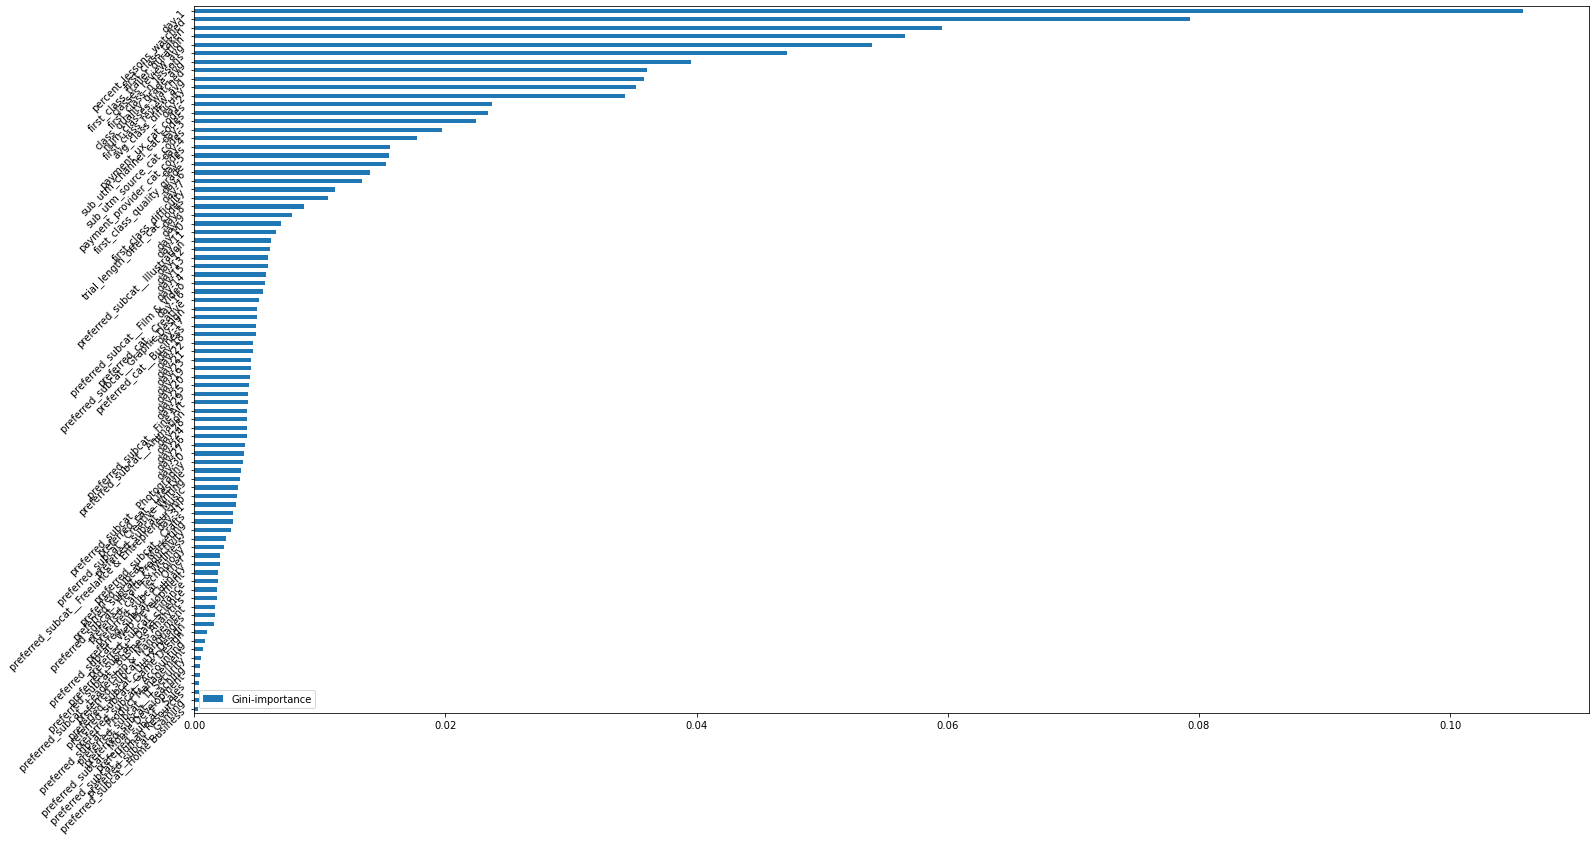

In [137]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(numer_df.drop(columns = ["success"]).columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='barh', rot=45, figsize = (25, 13))

In [138]:
importances.sort_values(by = 'Gini-importance', ascending=False).head(10)

,Gini-importance
day-1,0.105766
percent_lessons_watched,0.079296
first_class_taken,0.059500
first_class_trailer_duration,0.056568
classes_review_avg,0.053958
first_class_n_lessons,0.047232
class_quality_grade_avg,0.039569
num_classes_watched,0.036088
first_class_review_avg,0.035779
avg_class_difficulty,0.035195
